In [1]:
import numpy as np
from scipy.integrate import dblquad
from scipy.optimize import fsolve

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def K_stern_w(y,x):
    return np.cos(2*np.pi*x)+np.cos(2*np.pi*y)-np.cos(2*np.pi*x)*np.cos(2*np.pi*y)

def indicator_func (y,x):
    return 1

def Doppelintegral(f,a,b,c,d):
    return dblquad(f,a,b,c,d)[0]


#boundaries for the integral

def x_links(delta,a): # left outer
    return (np.arccos((a+1)/(2)))/(2*np.pi) + delta 

def x_rechts(delta, a): # right outer
    return  1- (np.arccos((a+1)/(2)))/(2*np.pi) - delta

def y_unten(x, a):
    return (np.arccos((a - np.cos(2*np.pi*x))/(1-np.cos(2*np.pi*x))))/(2*np.pi)

def y_oben(x, a):
    return 1 - (np.arccos(( a- np.cos(2*np.pi*x))/(1-np.cos(2*np.pi*x))))/(2*np.pi)

def y_unten_min(epsilon, a):
    return (np.arccos((a+1)/(2)))/(2*np.pi) + epsilon

def y_oben_max (epsilon, a):
    return 1- (np.arccos((a+1)/(2)))/(2*np.pi) - epsilon 


def x_links_innen(epsilon, a):
    def equation(x):
        return (np.arccos((a-np.cos(2*np.pi*x))/(1-np.cos(2*np.pi*x))))/(2*np.pi) - (np.arccos((a+1)/(2)))/(2*np.pi) - epsilon
    
    startwert = 0.2  
    numerical_solution = fsolve(equation, startwert)
    return numerical_solution

def x_rechts_innen(epsilon, a):
    return 1 - x_links_innen(epsilon, a)

def Per(delta, epsilon, a):
    return 2*(x_rechts(delta,a)-x_links(delta, a)) + 2 * (y_oben_max(epsilon, a) - y_unten_min(epsilon, a))

    
# combines level sets and truncation
def J(delta, epsilon, a):
    if x_links(delta,a) < x_links_innen(epsilon, a):
        return (-1 / Per(delta, epsilon, a) * (
            abs(Doppelintegral(K_stern_w, x_links(delta, a), x_links_innen(epsilon, a), 
                                lambda x: y_unten(x,a), lambda x: y_oben(x,a)) +
                Doppelintegral(K_stern_w, x_links_innen(epsilon,a), x_rechts_innen(epsilon,a), 
                                y_unten_min(epsilon,a), y_oben_max(epsilon,a)) + 
                Doppelintegral(K_stern_w, x_rechts_innen(epsilon, a), x_rechts(delta, a), lambda x: y_unten(x,a), lambda x: y_oben(x,a)))))
    else:
        return (-1/Per(delta, epsilon, a) *  abs(Doppelintegral(K_stern_w, x_links(delta,a), x_rechts(delta,a), 
                                y_unten_min(epsilon,a), y_oben_max(epsilon,a))))


# truncation just horizontal/vertical
def J_tilde(delta, epsilon):
     return (-1/Per(delta, epsilon, 0) * abs(Doppelintegral(K_stern_w, x_links(delta,0), x_rechts(delta,0), 
                                                            y_unten_min(epsilon,0), y_oben_max(epsilon,0))))

# just varying level sets
def J_hat(a):
    return ((-1/Per(0,0,a)) * abs(Doppelintegral(K_stern_w, x_links(0,a), x_rechts(0,a), lambda x: y_unten(x,a), lambda x : y_oben(x,a))))

In [2]:
#level sets and left/right/top/bottom truncation

N=20
A = np.linspace(-1, 0, N+1)
Deltas = np.linspace(0, 0.2, N+1)
Epsilons = np.linspace(0, 0.2, N+1)

l = []
j = []

for a in A :
    for delta in Deltas:
        for epsilon in Epsilons:
            value = J(delta, epsilon, a)
            l.append([delta, epsilon, a, value])
            j.append(value)
                  
print(l[j.index(min(j))])

[0.08, 0.08, -0.29999999999999993, -0.21213209282484602]


In [3]:
# Level sets

N=50
A = np.linspace(-2.6, 0.5, N+1)

p = []
q = []

for a in A:
    value = J_hat(a)
    p.append([a, value])
    q.append(value)
             
print(p[q.index(min(q))])

[-0.8640000000000001, -0.19376875897252688]


In [4]:
# rectangles

N=40 

Deltas = np.linspace(0, 0.25, N+1)
Epsilons = np.linspace(0, 0.25, N+1)

k = []
m = []
for epsilon in Epsilons:
    for delta in Deltas:       
        value = J_tilde(delta, epsilon)
        k.append([delta, epsilon, value])
        m.append(value)
        
print(k[m.index(min(m))])

[0.10625000000000001, 0.10625000000000001, -0.21213266264885644]


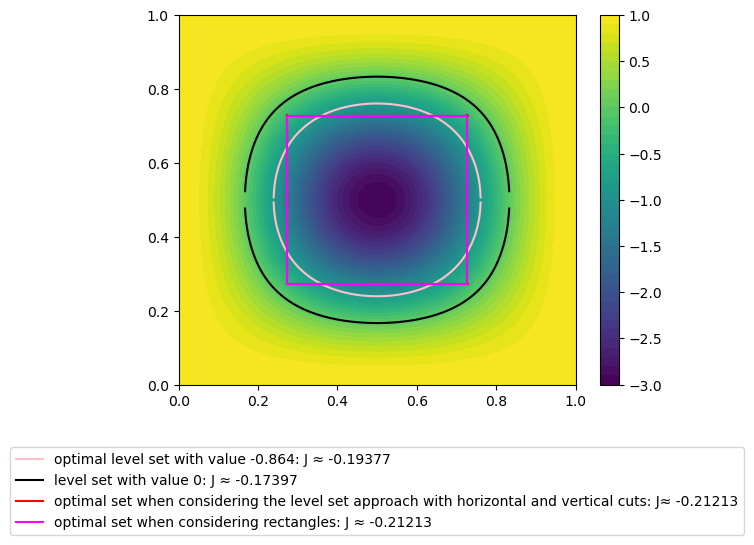

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
x, y = np.meshgrid(x, y)

z = np.cos(2*np.pi*x)+np.cos(2*np.pi*y)-np.cos(2*np.pi*x)*np.cos(2*np.pi*y)

plt.contourf(x, y, z, 40, cmap='viridis') 

plt.colorbar(label='')

# Level set approach
plt.plot(x[0], y_unten(x[0], p[q.index(min(q))][0]), color='pink' )
plt.plot(x[0], y_oben(x[0],p[q.index(min(q))][0]), color='pink', label=f'optimal level set with value {np.round(p[q.index(min(q))][0], 3)}: J \u2248 {np.round(p[q.index(min(q))][1],5)}' )

plt.savefig('example1_levelsets.png')  

plt.plot(x[0], y_unten(x[0], 0), color='black' )
plt.plot(x[0], y_oben(x[0],0), color='black', label=f'level set with value 0: J \u2248 {np.round(J_hat(0),5)}' )

# horizontal/vertikal boundaries
plt.plot([x_links(l[j.index(min(j))][0], l[j.index(min(j))][2]), x_links(l[j.index(min(j))][0], l[j.index(min(j))][2])], 
         [x_links_innen(l[j.index(min(j))][1],l[j.index(min(j))][2] ),x_rechts_innen(l[j.index(min(j))][1], l[j.index(min(j))][2]) ], 
         color='red')

plt.plot([x_rechts(l[j.index(min(j))][0], l[j.index(min(j))][2]), x_rechts(l[j.index(min(j))][0], l[j.index(min(j))][2])], 
         [x_links_innen(l[j.index(min(j))][1],l[j.index(min(j))][2] ),x_rechts_innen(l[j.index(min(j))][1], l[j.index(min(j))][2]) ], 
         color='red')

plt.plot([x_links_innen(l[j.index(min(j))][1], l[j.index(min(j))][2]), x_rechts_innen(l[j.index(min(j))][1], l[j.index(min(j))][2])], 
         [x_links(l[j.index(min(j))][0],l[j.index(min(j))][2] ),x_links(l[j.index(min(j))][0], l[j.index(min(j))][2]) ], 
         color='red')

plt.plot([x_links_innen(l[j.index(min(j))][1], l[j.index(min(j))][2]), x_rechts_innen(l[j.index(min(j))][1], l[j.index(min(j))][2])], 
         [x_rechts(l[j.index(min(j))][0],l[j.index(min(j))][2] ),x_rechts(l[j.index(min(j))][0], l[j.index(min(j))][2]) ], 
         color='red', label=f'optimal set when considering the level set approach with horizontal and vertical cuts: J\u2248 {np.round(l[j.index(min(j))][3],5)}')

plt.savefig('example1_combined.png') 

# just rectangles
plt.plot([x_links(k[m.index(min(m))][0], 0), x_links(k[m.index(min(m))][0], 0)], 
         [y_unten_min(k[m.index(min(m))][1],0),y_oben_max(k[m.index(min(m))][1], 0) ], 
         color='magenta')

plt.plot([x_rechts(k[m.index(min(m))][0], 0), x_rechts(k[m.index(min(m))][0],0)], 
         [y_unten_min(k[m.index(min(m))][1], 0 ),y_oben_max(k[m.index(min(m))][1], 0) ], 
         color='magenta')

plt.plot([x_links(k[m.index(min(m))][0],0), x_rechts(k[m.index(min(m))][0], 0)], 
         [y_unten_min(k[m.index(min(m))][1],0 ),y_unten_min(k[m.index(min(m))][1], 0) ], 
         color='magenta')

plt.plot([x_links(k[m.index(min(m))][0], 0), x_rechts(k[m.index(min(m))][0], 0)], 
         [y_oben_max(k[m.index(min(m))][1],0 ),y_oben_max(k[m.index(min(m))][1], 0) ], 
         color='magenta', label=f'optimal set when considering rectangles: J \u2248 {np.round(k[m.index(min(m))][2],5)}')

plt.savefig('example1_rectangular.png')  


plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

plt.savefig('plot.png')  
plt.show()

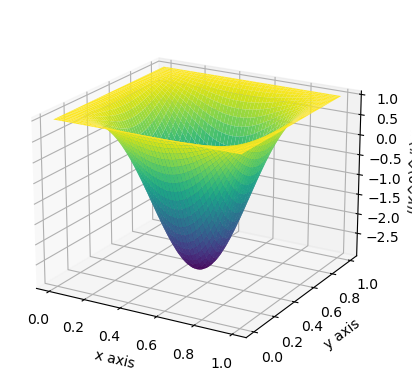

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
x, y = np.meshgrid(x, y)  # Erzeugt ein Gitter
z =  np.cos(2*np.pi*x)+np.cos(2*np.pi*y)-np.cos(2*np.pi*x)*np.cos(2*np.pi*y)

ax.plot_surface(x, y, z, cmap='viridis')

ax.view_init(20)

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('((K^0)^#)w')
ax.set_title('')
plt.savefig('example1.png')  

plt.show()
